# This code readas in USGS data from USGS open datasets

## loading data sources

In [32]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Define the USGS station ID for Washington DC
station_id = "01649500"  # USGS station ID for Washington DC

# Define the time period for data retrieval (start_date, end_date)
start_date = "2021-01-01"
end_date = "2021-03-01"

# Define the USGS endpoint URL
#usgs_url = f"https://waterdata.usgs.gov/nwis/dv?cb_00065=on&format=rdb&site_no={station_id}&startDT={start_date}&endDT={end_date}"
usgs_url = f"https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00065=on&format=rdb&site_no={station_id}&legacy=1&period=&begin_date={start_date}&end_date={end_date}"


## reading data into a dataframe

In [33]:

# Parse the data into a DataFrame
data = pd.read_csv(usgs_url,skiprows=27,sep='\t')

data = data[1:]
data["datetime"] = pd.to_datetime(data["datetime"])

data.columns= ['agency_cd', 'site_no', 'datetime', 'tz_cd', 'value',
       'na']

## showing the first 10 rows

In [36]:
data.head()

,agency_cd,site_no,datetime,tz_cd,value,na
1,USGS,01649500,2021-01-01 00:00:00,EST,1.01,A
2,USGS,01649500,2021-01-01 00:05:00,EST,1.01,A
3,USGS,01649500,2021-01-01 00:10:00,EST,1.02,A
4,USGS,01649500,2021-01-01 00:15:00,EST,1.02,A
5,USGS,01649500,2021-01-01 00:20:00,EST,1.01,A


## plotting the data

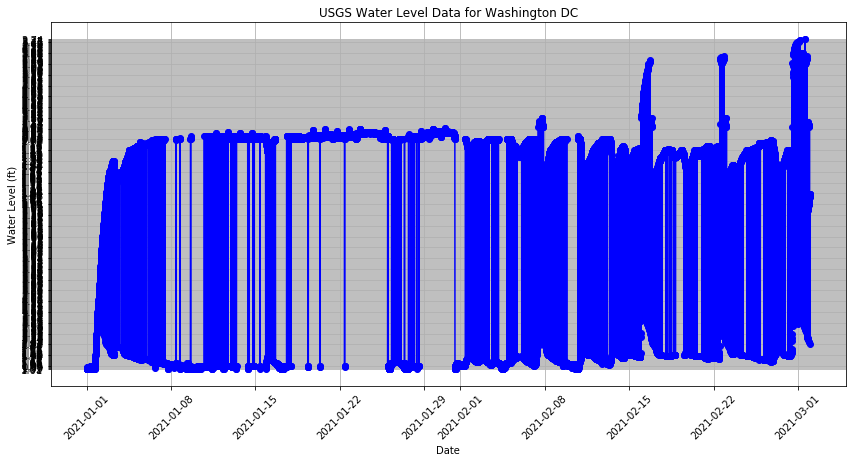

In [37]:

# Plot the water level data
plt.figure(figsize=(12, 6))
plt.plot(data["datetime"], data["value"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.title("USGS Water Level Data for Washington DC")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


